# 说明
** 目的：** 为探讨在同一个样本点集下，cma-es算法对$f(x)$拟合效果与分段数的关系，实验记录每个分段方案下cma-es过程的迭代时间，关系矩阵变化过程，计算结果，cpu计算时间等进行对比。  
** 函数： ** 
<center>$ f(x)=10sin0.6x+uniform(-1.5,1.5)gauss(0,5),x \in[-7,7)$  </center>
** 分段： **   为保证每段点数的一致性，通过$f(x)$在定义域内均匀分布300个样本点，段数分别为$PN(partition\  number) \in \{5,10,15,20,25,30\}$，对应CMA问题的求解维度从15至90，每段点数不小于10.  
**评价函数：**  
1. $M1$：分段测试函数的mse；
2. $M2$：在f1基础上增加间断点连续性判断指标：$\sum_{i=1}^{k} (e^{\Delta Y_i-\alpha}-1)$,其中$\Delta Y_i$ 代表拟合分段函数在间断点处的左右间断点差的绝对值,$\alpha $默认代表$Y$值域范围的$1\%$大小；
3. $M3$：在f2基础上增加间断点一阶导数评价指标：$\sum_{i=1}^{k}(e^{\frac{\Delta \sigma_i-\beta}{10e}}-1)$,其中$\Delta \sigma_i$代表左右间断点处的左右导数的$arctan$差的绝对值，$\beta$如未特殊说明全局默认为10度($\frac {\pi}{18}$)； 

# 实验

### 迭代次数与分段数关系图表

In [1]:
import makeData as md
%pylab inline
plt.rc('figure', figsize=(16, 9))
X=md.loadData('result.tl')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
b=[]
for i in range(5,35,5):
    temp=[]
    for j in range(3):
        temp.append(X[i][j]['iter'])
    b.append(temp)
bs=np.array(b).T
ind=range(5,35,5)
d={'M1':pd.Series(bs[0],index=ind),
   'M2':pd.Series(bs[1],index=ind),
   'M3':pd.Series(bs[2],index=ind)}
df = pd.DataFrame(d)
df.columns.name='function'
df.index.name='partition'
df

function,M1,M2,M3
partition,,,
5,624,1379,1466
10,2548,7006,5941
15,6333,19248,19219
20,11703,38264,41027
25,18652,6692,73007
30,28149,15486,66815


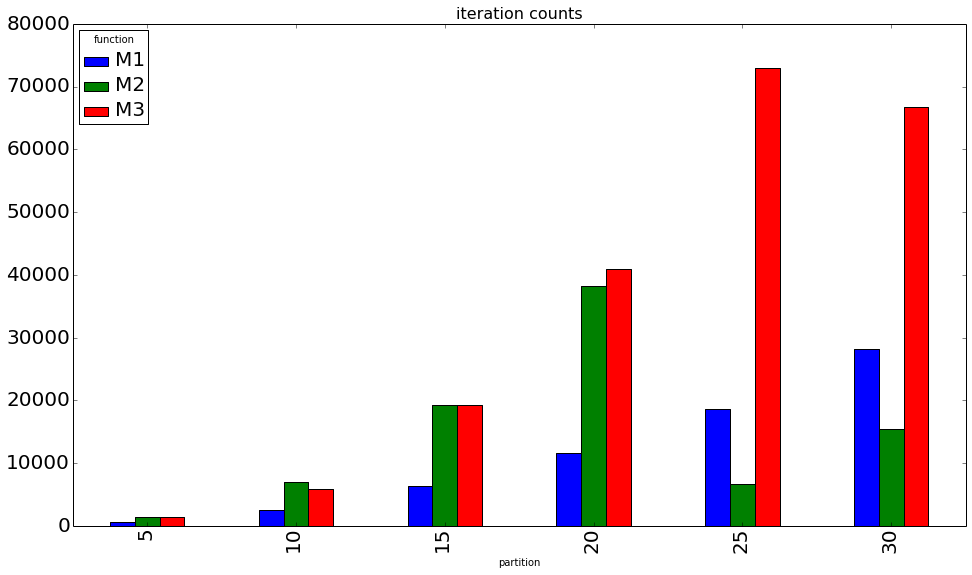

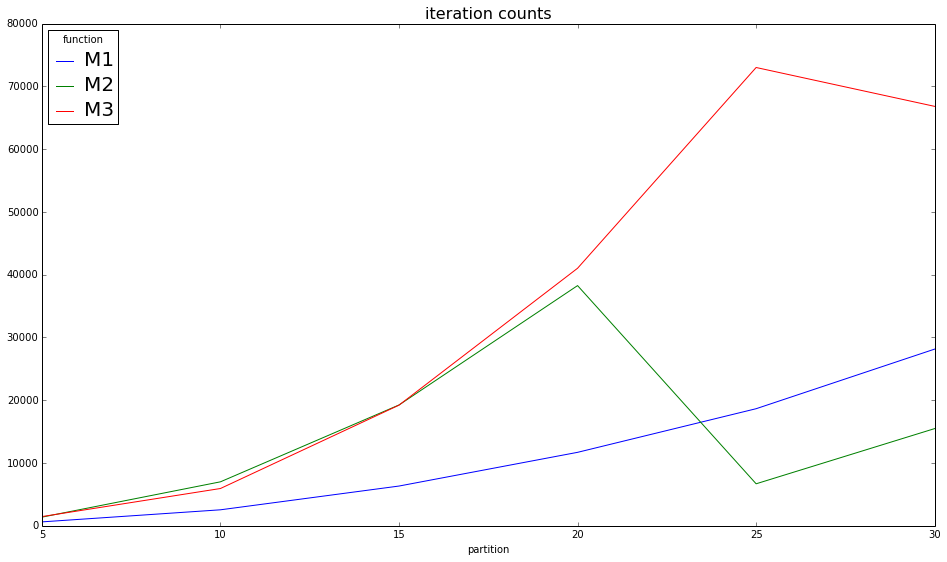

In [3]:
df.plot(kind='bar',fontsize=20)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='20')
plt.title("iteration counts",fontsize=16)
df.plot()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='20')
plt.title("iteration counts",fontsize=16)

### cpu计算耗时与分段数关系图表

In [4]:
b=[]
for i in range(5,35,5):
    temp=[]
    for j in range(3):
        temp.append(X[i][j]['time'])
    b.append(temp)
bs=np.array(b).T
ind=range(5,35,5)
d={'M1':pd.Series(bs[0],index=ind),
   'M2':pd.Series(bs[1],index=ind),
   'M3':pd.Series(bs[2],index=ind)}
df = pd.DataFrame(d)
df.columns.name='function'
df.index.name='partition'
df

function,M1,M2,M3
partition,,,
5,2.879117,7.312524,8.037126
10,13.421913,37.904853,33.263828
15,39.362254,120.963716,129.044396
20,86.019836,292.885635,321.607322
25,161.699401,59.155206,678.904996
30,236.091226,133.326601,596.143002


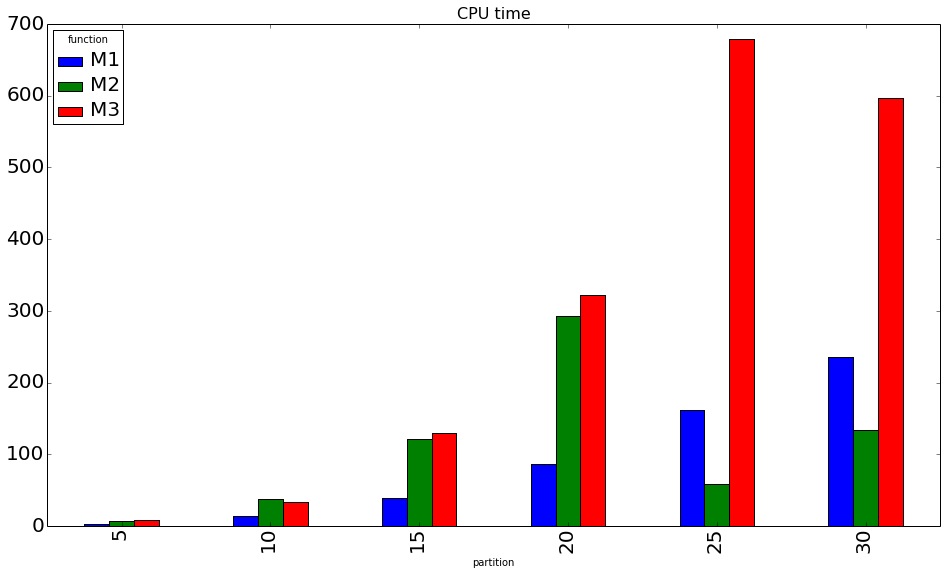

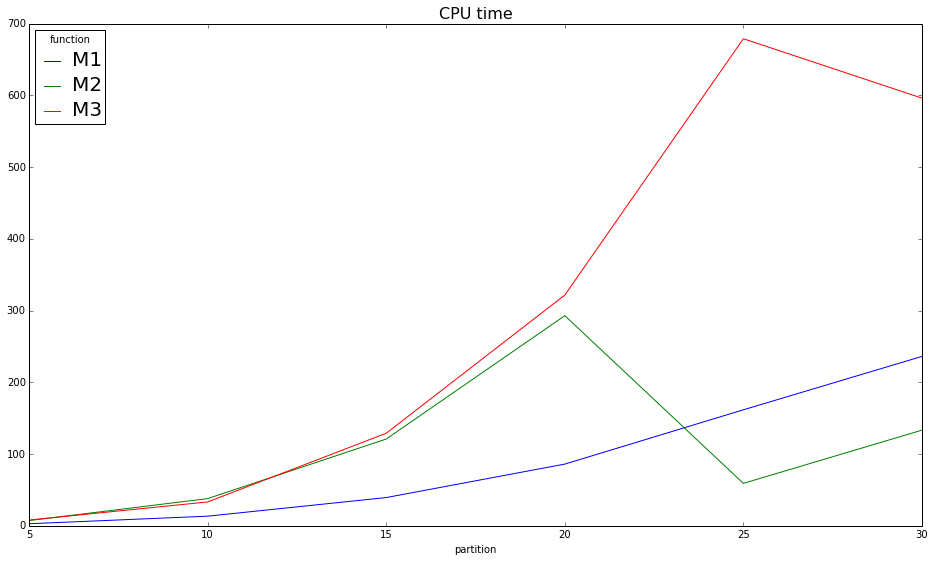

In [5]:
df.plot(kind='bar',fontsize=20)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='20')
plt.title("CPU time ",fontsize=16)
df.plot()
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='20')
plt.title("CPU time",fontsize=16)

### 随分段数变化拟合情况
![](img/img_5.pdf)
![](img/img_10.pdf)
![](img/img_15.pdf)
![](img/img_20.pdf)
![](img/img_25.pdf)
![](img/img_30.pdf)